<a href="https://colab.research.google.com/github/Karuni001/Elite-Tech-intern/blob/main/Decision_Tree_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#decision tree implementation


In [35]:
#importing libraries
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
#downloading dataset
path = kagglehub.dataset_download("rishikeshkonapure/home-loan-approval")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rishikeshkonapure/home-loan-approval/versions/1


In [37]:
#loading dataset
train_path = path + "/loan_sanction_train.csv"
df = pd.read_csv(train_path)

In [38]:
#handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-38-3d4d6e023eb0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [39]:
#categorical to numerical
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [40]:
#converting target values
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [42]:
#defining fetures and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

In [43]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#training decision model
model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [47]:
#model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Training Complete! Accuracy: {accuracy:.2%}")

✅ Model Training Complete! Accuracy: 72.36%


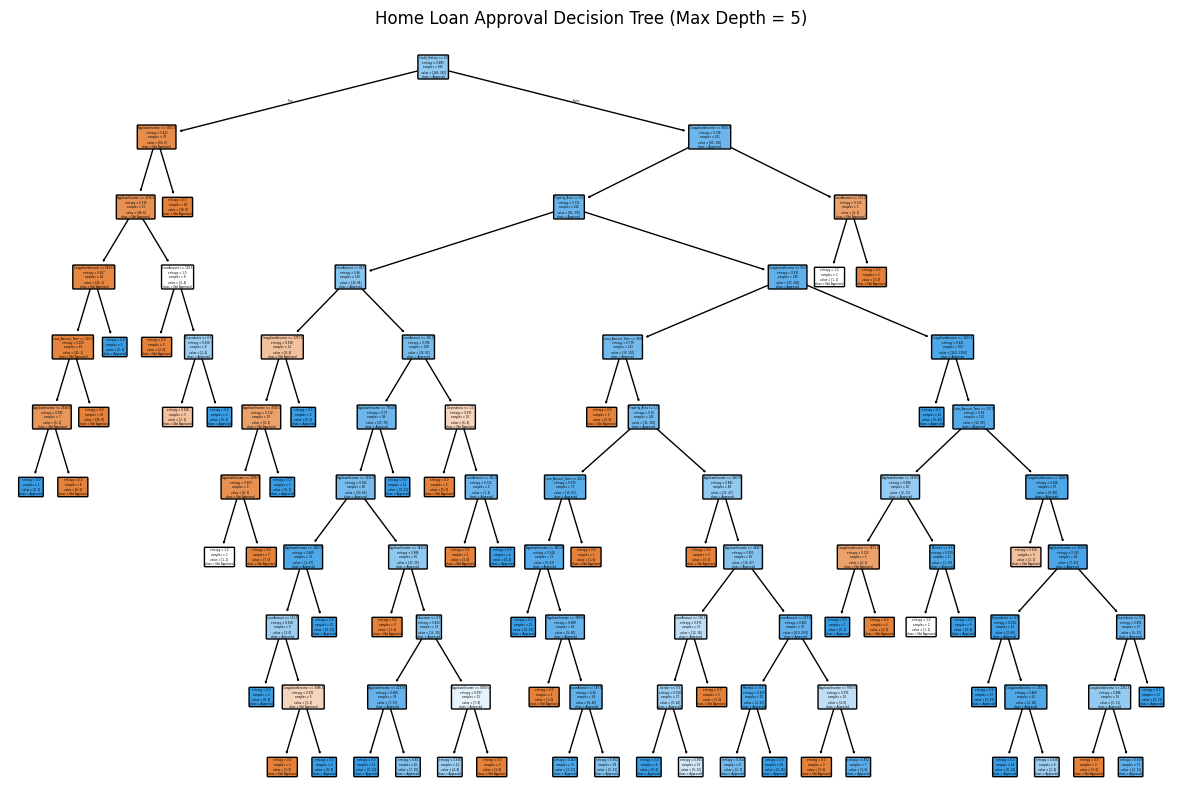

In [52]:
#plotting decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=["Not Approved", "Approved"], filled=True, rounded=True)
plt.title("Home Loan Approval Decision Tree (Max Depth = 5)")
plt.show()


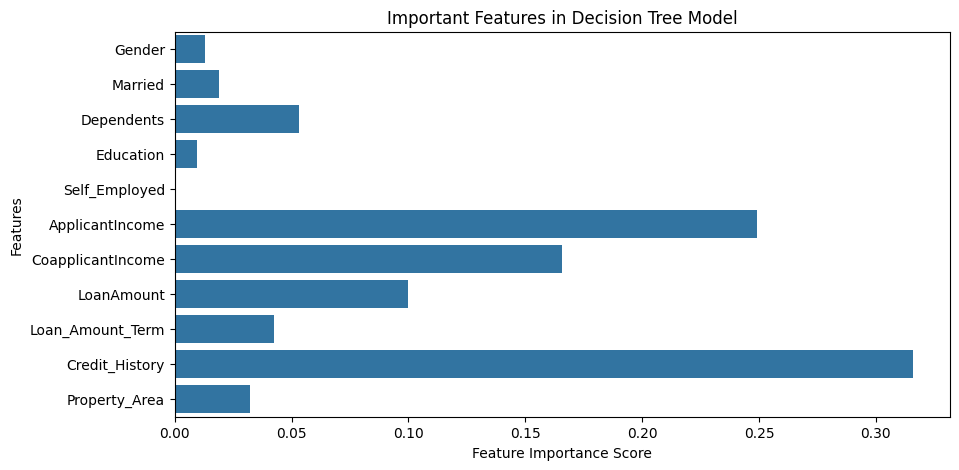

In [50]:
#feature importance
import seaborn as sns

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features in Decision Tree Model")
plt.show()

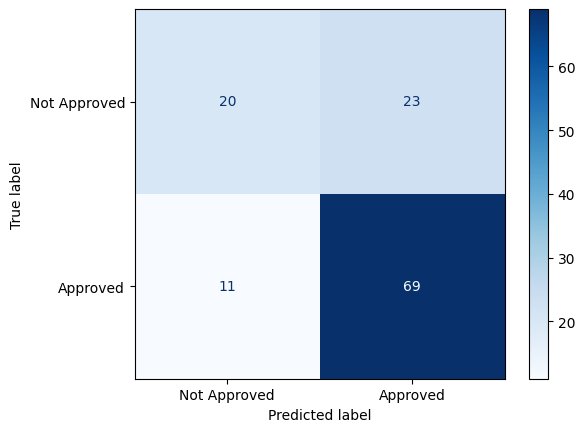

In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Approved", "Approved"])
disp.plot(cmap="Blues")
plt.show()
